In [4]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 3060 Laptop GPU (UUID: GPU-976337a7-103f-7382-68ee-2b3deb306006)


In [ ]:
!wget https://raw.githubusercontent.com/RandRothstein/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
from helper_functions import unzip_data,create_tensorboard_callback,plot_loss_curves,compare_historys

'wget' is not recognized as an internal or external command,
operable program or batch file.


# Kaggle Dataset: To label a tweet Disaster or Non Disaster

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
import zipfile
def unzip_data(file):
    unzip=zipfile.ZipFile(file)
    unzip.extractall()
    unzip.close()
unzip_data("nlp_getting_started.zip")

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import pandas as pd
data=pd.read_csv('sample_submission.csv')
data.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [71]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_data['text'][2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [72]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [69]:
train_data_shuffled=train_data.sample(frac=1,random_state=42)
train_data_shuffled[["text","target"]]

,text,target
2644,So you have a new weapon that can cause un-ima...,1
2227,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,Aftershock back to school kick off was great. ...,0
6845,in response to trauma Children of Addicts deve...,0
...,...,...
5226,@Eganator2000 There aren't many Obliteration s...,0
5390,just had a panic attack bc I don't have enough...,0
860,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,Officials say a quarantine is in place at an A...,1


In [8]:
train_data.keyword.value_counts()

,count
keyword,
fatalities,45
deluge,42
armageddon,42
damage,41
body%20bags,41
...,...
forest%20fire,19
epicentre,12
threat,11


In [9]:
import random

random_index=random.randint(0,len(train_data)-5)

for row in train_data_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _,text,target=row
  print(f"Target:{target}","Real Disaster" if target>0 else "Not a real disaster")
  print(f"Texts:\n{text}\n")
  print("------------\n")


Target:0 Not a real disaster
Texts:
@Pete_r_Knox @Gemmasterful I think the mudslide cake lady will go and the hipster will unfortunately stay.

------------

Target:0 Not a real disaster
Texts:
collapsed the moment i got home last night lol

------------

Target:1 Real Disaster
Texts:
This is unbelievably insane.
#man #airport #airplane #aircraft #aeroplane #runway #accident #freakyÛ_ https://t.co/cezhq7CzLl

------------

Target:1 Real Disaster
Texts:
Catastrophic wild fires threatening U.S. Mid west &amp; Republicans fighting new climate change rules I guess this is the ultimate in Darwinism

------------

Target:0 Not a real disaster
Texts:
#OnThisDay in 1620 the Mayflower set sail for the New World. Read @LaphamsQuart: http://t.co/ssn1mxSFOA http://t.co/FW8ElbnAP7

------------



In [10]:
# train_test_split experts inputs to be numpy
from sklearn.model_selection import train_test_split
sentance_train,sentance_test,labels_train,labels_test=train_test_split(train_data_shuffled['text'].to_numpy(),train_data_shuffled['target'].to_numpy(),test_size=0.1,random_state=42)

In [11]:
len(sentance_train),len(sentance_test),len(labels_train),len(labels_test)

(6851, 762, 6851, 762)

In [12]:
from tensorflow.keras.layers import TextVectorization

text_vectorizer=TextVectorization(max_tokens=None, #The number of input words
                                  standardize="lower_and_strip_punctuation",
                                  ngrams=None, # The number of grouping each words in a sentance
                                  split="whitespace",
                                  output_mode="int", # tf-idf   [ term frequency - inverse document frequency]
                                  output_sequence_length=None,
                                  pad_to_max_tokens=False
                                  )

In [13]:
len(sentance_train[0].split())

7

In [14]:
# It return the average number of tokens in from all the sentance
round(sum([len(i.split()) for i in sentance_train])/len(sentance_train))

15

In [15]:
max([len(i.split()) for i in sentance_train])

31

In [16]:
min([len(i.split()) for i in sentance_train])

1

In [17]:
list(map(lambda x:x.split() ,sentance_train[0]))

[['@'],
 ['m'],
 ['o'],
 ['g'],
 ['a'],
 ['c'],
 ['o'],
 ['l'],
 ['a'],
 [],
 ['@'],
 ['z'],
 ['a'],
 ['m'],
 ['t'],
 ['r'],
 ['i'],
 ['o'],
 ['s'],
 ['s'],
 ['u'],
 [],
 ['i'],
 [],
 ['s'],
 ['c'],
 ['r'],
 ['e'],
 ['a'],
 ['m'],
 ['e'],
 ['d'],
 [],
 ['a'],
 ['f'],
 ['t'],
 ['e'],
 ['r'],
 [],
 ['h'],
 ['i'],
 ['t'],
 ['t'],
 ['i'],
 ['n'],
 ['g'],
 [],
 ['t'],
 ['w'],
 ['e'],
 ['e'],
 ['t']]

In [18]:
text_vectorizer.adapt(sentance_train)

In [19]:
words = text_vectorizer.get_vocabulary()
filtered_words = [w for w in words if not w.isdigit()]
top5 = filtered_words[-5:]

print(top5)


[np.str_('1008planet\x89Û'), np.str_('1000s'), np.str_('1000amp1000'), np.str_('0802pm'), np.str_('05th')]


In [20]:
# Setup text vectorization with custom variables
max_vocab_length = 15000 # max number of words to have in our vocabulary
max_length = 20 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)


In [21]:
text_vectorizer.adapt(sentance_train)

In [22]:
random_sentance=random.choice(sentance_train)
print(f"Before tokenization:{random_sentance}")

print(f"After tokenization:{text_vectorizer([random_sentance])}")

Before tokenization:#Cowboys: George: Injury woes took Claiborne from first round to trying to stick around; can he do it?:  http://t.co/12giQbVLYs
After tokenization:[[5899 2449  345 6717 1166    1   20   97 1604    5  563    5 4536  470
    71   56   68   15    1    0]]


In [23]:
words_used=text_vectorizer.get_vocabulary()
top5=words_used[:5]
bottom5=words_used[-5:]
print(f"Top 5 most frequently used words:{top5}\n")
print(f"Bottom 5 less freqeuntly used words:{bottom5}")

Top 5 most frequently used words:['', '[UNK]', np.str_('the'), np.str_('a'), np.str_('in')]

Bottom 5 less freqeuntly used words:[np.str_('httptcoe7fn5g5ruu'), np.str_('httptcoe65v80fcus'), np.str_('httptcoe61x9y65qd'), np.str_('httptcoe5cns6ufpa'), np.str_('httptcoe4ydbm4dx6')]


Creating **Embedding**

In [99]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

In [100]:
random_sentance=random.choice(sentance_train)
print(f"Before tokenization:{random_sentance}")
er=embedding(text_vectorizer([random_sentance]))
print(f"After tokenization:{embedding(text_vectorizer([random_sentance]))}")
er[0][1].shape

Before tokenization:Photoshop Tools Crash Course - Complete Photoshop Tool Guide http://t.co/DunMvj7ITl #course http://t.co/RgdrJv63hF
After tokenization:[[[ 3.86440493e-02  8.22532177e-03  2.17779987e-02 ...  3.19963954e-02
    3.77817042e-02  3.13164331e-02]
  [-2.13229898e-02  2.03893334e-03 -2.47309357e-03 ...  1.06513873e-02
    3.80444638e-02 -2.55700704e-02]
  [ 4.28814553e-02  4.36160825e-02 -2.90379412e-02 ...  6.56599924e-03
    1.70646645e-02 -5.38714230e-05]
  ...
  [ 1.41741745e-02 -2.13994142e-02 -3.80335823e-02 ... -8.66224617e-03
   -4.33097482e-02 -2.22341176e-02]
  [ 1.41741745e-02 -2.13994142e-02 -3.80335823e-02 ... -8.66224617e-03
   -4.33097482e-02 -2.22341176e-02]
  [ 1.41741745e-02 -2.13994142e-02 -3.80335823e-02 ... -8.66224617e-03
   -4.33097482e-02 -2.22341176e-02]]]


TensorShape([128])

**Building Our Navi Bayes Model with tf-idf functionality**

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ('tfidf layer',TfidfVectorizer()),
    ('Naive Bayes layer',MultinomialNB())
]
)

model_0.fit(sentance_train,labels_train)

Pipeline(steps=[('tfidf layer', TfidfVectorizer()),
                ('Naive Bayes layer', MultinomialNB())])

In [102]:
score=model_0.score(sentance_test,labels_test)
print(f"Base Line score: {(score*100):.2f}%")

Base Line score: 79.27%


In [103]:
preds=model_0.predict(sentance_test)
preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [104]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_evalueation(y_true,y_pred):
  model_accuracy=accuracy_score(y_true,y_pred)*100
  model_precision,model_recall,model_f1,_=precision_recall_fscore_support(y_true,y_pred,average="weighted")
  result={
      "Accuracy":model_accuracy,
      "Precision":model_precision,
      "Recall":model_recall,
      "F1":model_f1
  }
  return result

In [105]:
base_line=calculate_evalueation(y_true=labels_test,y_pred=preds)

In [31]:
from helper_functions import create_tensorboard_callback
log_dir="model_1_logs"

In [32]:
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import regularizers

input=layers.Input(shape=(1,),dtype=tf.string,name="Input_Layer")
x=text_vectorizer(input)
x=embedding(x)
x = layers.GlobalAveragePooling1D()(x)
x=layers.Dropout(0.5)(x)
#x = layers.BatchNormalization()(x)

output=layers.Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.7),name="Output_Layer")(x)
model_1=tf.keras.Model(input,output,name="Model_2_dense")
model_1.summary()

Model: "Model_2_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 20)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 20, 128)        │     1,920,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,920,129 (7.32 MB)

 Trainable params: 1,920,129 (7.32 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',factor=0.2,patience=5,min_lr=1e-7)
check_point=tf.keras.callbacks.ModelCheckpoint("model_1_checkpoint.keras",monitor='val_accuracy',save_best_only=True)

model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
history_1=model_1.fit(sentance_train,labels_train,epochs=10,validation_data=(sentance_test,labels_test),callbacks=[create_tensorboard_callback(log_dir,"Model_1_FeedDense"),check_point])

Saving TensorBoard log files to: model_1_logs/Model_1_FeedDense/20250614-090023
Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5913 - loss: 1.3966 - val_accuracy: 0.5433 - val_loss: 0.7156
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5644 - loss: 0.6975 - val_accuracy: 0.5433 - val_loss: 0.6886
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5755 - loss: 0.6811 - val_accuracy: 0.5433 - val_loss: 0.6879
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5789 - loss: 0.6776 - val_accuracy: 0.5433 - val_loss: 0.6870
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5705 - loss: 0.6776 - val_accuracy: 0.5433 - val_loss: 0.6855
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5698 - loss: 0.6741 - val_accuracy: 0.5433 - val_loss: 0.6837
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5753 - loss: 0.6693 - val_accuracy: 0.5459 - val_loss: 0.6821
Epoch 8/10
215/21

In [34]:
model_1.evaluate(sentance_test,labels_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6068 - loss: 0.6773 


[0.6683048605918884, 0.6246719360351562]

In [35]:
preds=model_1.predict(sentance_test)
preds[0]


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


array([0.38844845], dtype=float32)

In [36]:
best_model=tf.keras.models.load_model("model_1_checkpoint.keras")
best_model.evaluate(sentance_test,labels_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6068 - loss: 0.6773


[0.6683048605918884, 0.6246719360351562]

In [37]:
preds=best_model.predict(sentance_test)
print(preds.shape)
preds[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
(762, 1)


array([[0.38844845],
       [0.5005583 ],
       [0.5520299 ],
       [0.32806593],
       [0.41452906],
       [0.45551738],
       [0.48347202],
       [0.5148521 ],
       [0.45712972],
       [0.3202267 ]], dtype=float32)

In [38]:
preds=tf.squeeze(tf.round(preds))
preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)>

**LSTM Model**

In [39]:
from tensorflow.keras import layers

inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.LSTM(64,return_sequences=True)(x)
x=layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64,activation='relu')(x)  # outputs (None, 64)
x = layers.Dropout(0.7)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2=tf.keras.Model(inputs,outputs,name="model_2_LSTM")
model_2.summary()

Model: "model_2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 20)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 20, 128)        │     1,920,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 20, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,973,633 (7.53 MB)

 Trainable params: 1,973,633 (7.53 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model_2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
history_2=model_2.fit(sentance_train,labels_train,epochs=10,validation_data=(sentance_test,labels_test),callbacks=[create_tensorboard_callback(log_dir,"Model_2_LSTM")])

Saving TensorBoard log files to: model_1_logs/Model_2_LSTM/20250614-090122
Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8193 - loss: 0.4372 - val_accuracy: 0.7927 - val_loss: 0.4718
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9156 - loss: 0.2376 - val_accuracy: 0.7822 - val_loss: 0.5204
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9547 - loss: 0.1366 - val_accuracy: 0.7703 - val_loss: 0.6183
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.9680 - loss: 0.0937 - val_accuracy: 0.7913 - val_loss: 0.7868
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9791 - loss: 0.0646 - val_accuracy: 0.7651 - val_loss: 0.8897
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9850 - loss: 0.0497 - val_accuracy: 0.7677 - val_loss: 1.1038
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9892 - loss: 0.0321 - val_accuracy: 0.7638 - val_loss: 1.0132
Epoch 8/10
215/215

In [41]:
  preds=model_2.predict(sentance_test)
  preds=tf.squeeze(tf.round(preds))
  calculate_evalueation(labels_test,preds)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


{'Accuracy': 75.59055118110236,
 'Precision': 0.756358217141213,
 'Recall': 0.7559055118110236,
 'F1': 0.754212612519794}

**Gated Recurrent Unit Model**

In [42]:
input=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(input)
x=embedding(x)
x=layers.GRU(64,return_sequences=False)(x)
#x=layers.GlobalAveragePooling1D()(x)
#x=layers.Dense(64,activation='relu')(x)
#x=layers.Dropout(0.7)(x)
output=layers.Dense(1,activation='sigmoid')(x)
model_3=tf.keras.Model(input,output,name="model_3_GRU")
model_3.summary()

Model: "model_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 20)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 20, 128)        │     1,920,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,957,313 (7.47 MB)

 Trainable params: 1,957,313 (7.47 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model_3.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
history_3=model_3.fit(sentance_train,labels_train,epochs=10,validation_data=(sentance_test,labels_test),callbacks=[create_tensorboard_callback(log_dir,"Model_3_GRU")])

Saving TensorBoard log files to: model_1_logs/Model_3_GRU/20250614-090253
Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.8240 - loss: 0.3502 - val_accuracy: 0.7717 - val_loss: 0.8848
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9864 - loss: 0.0403 - val_accuracy: 0.7795 - val_loss: 0.9139
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.9906 - loss: 0.0314 - val_accuracy: 0.7703 - val_loss: 0.8784
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9910 - loss: 0.0256 - val_accuracy: 0.7388 - val_loss: 1.0972
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9916 - loss: 0.0210 - val_accuracy: 0.7415 - val_loss: 1.2475
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9904 - loss: 0.0235 - val_accuracy: 0.7612 - val_loss: 1.0072
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9935 - loss: 0.0168 - val_accuracy: 0.7192 - val_loss: 1.4959
Epoch 8/10
215/215 

In [106]:
preds=model_3.predict(sentance_test[:10])
preds=tf.squeeze(tf.round(preds))
result_3=calculate_evalueation(labels_test[:10],preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


**Bi Directional Model**

In [45]:
input=tf.keras.layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(input)
x=embedding(x)
#x=layers.Bidirectional(layers.GRU(64,return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(64))(x)
output=layers.Dense(1,activation='sigmoid')(x)
model_4=tf.keras.Model(input,output,name="model_4_Bidirectional")
model_4.summary()

Model: "model_4_Bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 20)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 20, 128)        │     1,920,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,018,945 (7.70 MB)

 Trainable params: 2,018,945 (7.70 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model_4.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_4.fit(sentance_train,labels_train,epochs=5,validation_data=(sentance_test,labels_test),callbacks=[create_tensorboard_callback(log_dir,"Model_4_Bidirectional")])

Saving TensorBoard log files to: model_1_logs/Model_4_Bidirectional/20250614-090432
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8910 - loss: 0.2339 - val_accuracy: 0.7467 - val_loss: 0.9271
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9917 - loss: 0.0264 - val_accuracy: 0.7756 - val_loss: 0.9721
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9930 - loss: 0.0196 - val_accuracy: 0.7415 - val_loss: 1.2076
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9933 - loss: 0.0167 - val_accuracy: 0.7467 - val_loss: 1.2525
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9921 - loss: 0.0169 - val_accuracy: 0.7310 - val_loss: 1.3546


**1D CONVOLUTIONAL NEURAL NET**

input-->tokenization-->embedding-->layers(s)-->pooling-->outpus


In [47]:
input=tf.keras.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(input)
x=embedding(x)
x=tf.keras.layers.Conv1D(filters=64,kernel_size=5,activation='tanh',padding='same',strides=1)(x)
x=tf.keras.layers.MaxPool1D(pool_size=2)(x)
x=tf.keras.layers.GlobalAveragePooling1D()(x)
output=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model_5=tf.keras.Model(input,output,name="model_5_Convolutional")

model_5.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
history_5=model_5.fit(sentance_train,labels_train,epochs=5,validation_data=(sentance_test,labels_test),callbacks=[create_tensorboard_callback(log_dir,"Model_5_Convolutional")])

Saving TensorBoard log files to: model_1_logs/Model_5_Convolutional/20250614-090528
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.8805 - loss: 0.2692 - val_accuracy: 0.7651 - val_loss: 0.6542
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9813 - loss: 0.0644 - val_accuracy: 0.7520 - val_loss: 0.8148
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9877 - loss: 0.0405 - val_accuracy: 0.7493 - val_loss: 0.9040
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9891 - loss: 0.0360 - val_accuracy: 0.7585 - val_loss: 0.9955
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9926 - loss: 0.0258 - val_accuracy: 0.7480 - val_loss: 1.0312


**Transfer Learning**

In [48]:
import tensorflow_hub as hub
import tensorflow as tf

embedd=hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

embeddings = embedd([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings)

tf.Tensor(
[[-0.03133017 -0.06338634 -0.01607501 ... -0.03242778 -0.0457574
   0.05370456]
 [ 0.0508086  -0.01652434  0.01573779 ...  0.00976657  0.03170121
   0.01788118]], shape=(2, 512), dtype=float32)


In [49]:
embeddings.shape

TensorShape([2, 512])

In [50]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")
sentence_encoder_layer

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
from keras.saving import register_keras_serializable

# Wrap the USE model in a custom Keras layer
@register_keras_serializable()
class USELayer(layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.use = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

    def call(self, inputs):
        return self.use(inputs)

# Define the model using Functional API
inputs = keras.Input(shape=(), dtype=tf.string, name="text_input")
x = USELayer()(inputs)  # our custom wrapper layer
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_6 = keras.Model(inputs=inputs, outputs=outputs, name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

model_6.summary()

model_6.save(r"C:\Users\Rand Rothstein\OneDrive\Desktop\Harmful_Message_Dector\Model")


NameError: name 'hub' is not defined

In [84]:
history_6=model_6.fit(sentance_train,labels_train,steps_per_epoch=int(1*len(sentance_train)),epochs=15,validation_data=(sentance_test,labels_test),callbacks=[create_tensorboard_callback(log_dir,"Model_6_TransferLearning")],initial_epoch=10)

Saving TensorBoard log files to: model_1_logs/Model_6_TransferLearning/20250614-092343
Epoch 11/15
6851/6851 ━━━━━━━━━━━━━━━━━━━━ 71s 10ms/step - accuracy: 0.9349 - loss: 0.1931 - val_accuracy: 0.8071 - val_loss: 0.6435
Epoch 12/15
6851/6851 ━━━━━━━━━━━━━━━━━━━━ 80s 10ms/step - accuracy: 0.9620 - loss: 0.1200 - val_accuracy: 0.8110 - val_loss: 0.6762
Epoch 13/15
6851/6851 ━━━━━━━━━━━━━━━━━━━━ 85s 11ms/step - accuracy: 0.9660 - loss: 0.1110 - val_accuracy: 0.8005 - val_loss: 0.7488
Epoch 14/15
6851/6851 ━━━━━━━━━━━━━━━━━━━━ 84s 11ms/step - accuracy: 0.9674 - loss: 0.1075 - val_accuracy: 0.7953 - val_loss: 0.8490
Epoch 15/15
6851/6851 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - accuracy: 0.9745 - loss: 0.0923 - val_accuracy: 0.8123 - val_loss: 0.8667


In [80]:
percent_train_data=train_data[['text','target']].sample(frac=0.1,random_state=42)
percent_train=percent_train_data['text'].to_numpy()
percent_test=percent_train_data['target'].to_list()

In [85]:
model_7=tf.keras.models.clone_model(model_6)
model_7.summary()

Model: "model_6_USE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)         │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ use_layer_2 (USELayer)          │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 263,169 (1.00 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
result=pd.DataFrame({"baseline":base_line,
                       "Model_3":result_3})

result=result.transpose()
print(result)
result['Accuracy']=result['Accuracy']/100

           Accuracy  Precision    Recall        F1
baseline  79.265092   0.811139  0.792651  0.786219
Model_3   60.000000   0.600000  0.600000  0.600000


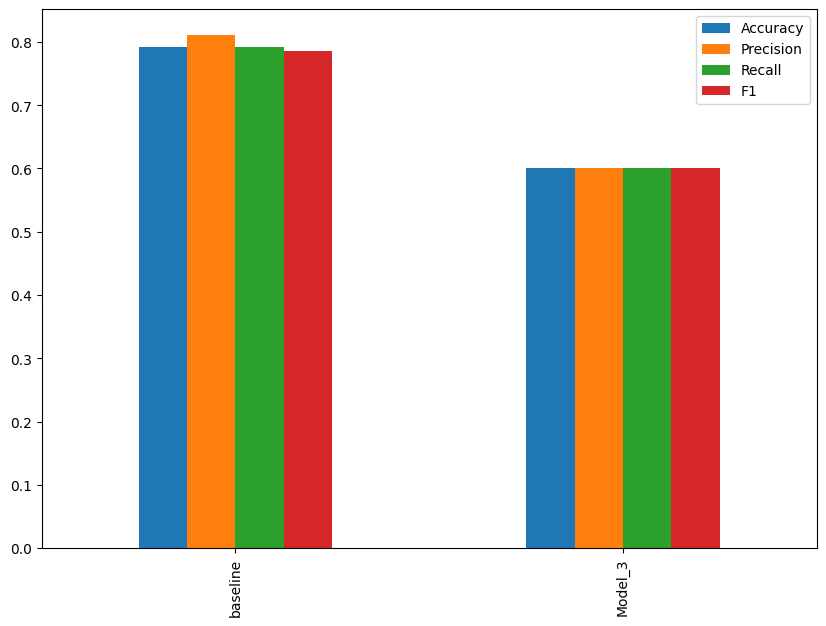

In [119]:
result.plot(kind='bar',figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

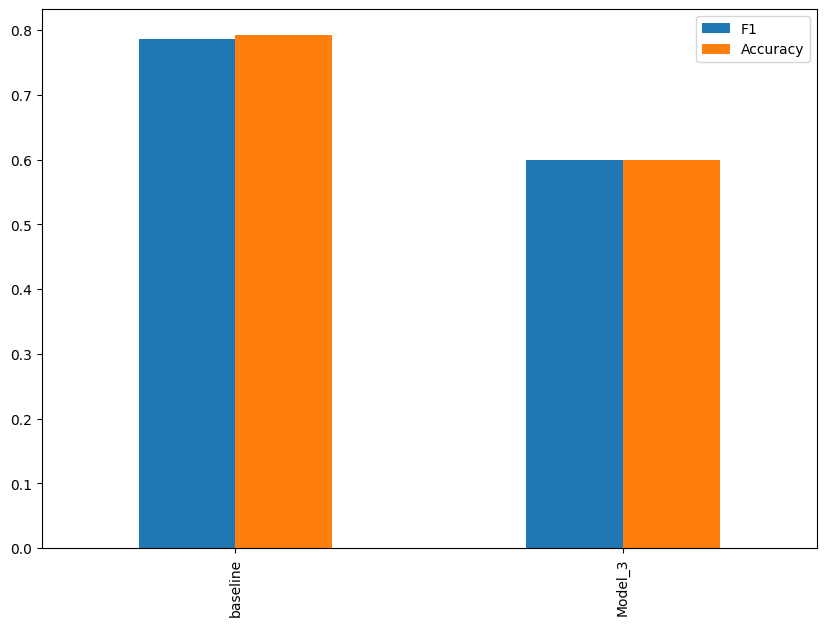

In [134]:
result.sort_values(by='F1',ascending=False)[['F1','Accuracy']].plot(kind='bar',figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))


In [133]:
  !tensorboard dev upload -- ./model_1_logs/ \
    --name "NLP Experiments" \
    --descrption "Compare Models" \
    --one_shot

2025-06-14 10:16:20.948133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749896181.043759   82069 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749896181.077371   82069 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
ERROR: The `tensorboard dev` command is no longer available.

TensorBoard.dev has been shut down. For further information,
see the FAQ at <https://tensorboard.dev/>.


In [136]:
model_6.save("model_6.h5")


In [139]:
loaded_model_6 = tf.keras.models.load_model(
    "model_6.h5",
    custom_objects={"USELayer": USELayer}
)

In [148]:
model_6.save("model_6_formate.keras")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=model_6_formate.

In [147]:
loaded_2=tf.keras.models.load_model("model_6_formate.keras")

In [149]:
loaded_2.summary()

Model: "model_6_USE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)         │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ use_layer_3 (USELayer)          │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 789,509 (3.01 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 526,340 (2.01 MB)

###Finding the most Wrongly predicted sentance

In [151]:
probs=model_6.predict(sentance_test)
preds=tf.squeeze(tf.round(probs))

val_df=pd.DataFrame({
    "text":sentance_test,
    "target":labels_test,
    "pred":preds,
    "prob":tf.squeeze(probs)
})

val_df.head()

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step


,text,target,pred,prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,1.0,0.506077
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.512165
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.516701
3,@camilacabello97 Internally and externally scr...,1,1.0,0.512488
4,Radiation emergency #preparedness starts with ...,1,0.0,0.494428


In [156]:
df_data=val_df[val_df['target'] !=val_df['pred']].sort_values('prob',ascending=False,ignore_index=False)

In [162]:

for row in df_data[:10].itertuples():
  _,text,target,pred,prob=row
  print(f"Target: {target},Preds: {pred},Probs: {prob}")
  print(f"Texts:\n{text}\n")
  print("------------\n")

Target: 0,Preds: 1.0,Probs: 0.5280321836471558
Texts:
crushed a 6 mile run tonight. awesome

------------

Target: 0,Preds: 1.0,Probs: 0.5247251391410828
Texts:
@DavidVonderhaar if you loved me even a little youd put demolition in bo3

------------

Target: 0,Preds: 1.0,Probs: 0.5228713154792786
Texts:
I liked a @YouTube video http://t.co/FX7uZZXtE4 Benedict Cumberbatch Gets Video Bombed

------------

Target: 0,Preds: 1.0,Probs: 0.5220643281936646
Texts:
NO WAYS!!! A video for 'Stretcher'?!  @Ofentse_Tsie

------------

Target: 0,Preds: 1.0,Probs: 0.5214250683784485
Texts:
Child Shoulder Bags PVC Shoulder Book Bag Cartoon Cross Body Bags for Girls http://t.co/7l9qAzLjVg http://t.co/Q0hSyfrwEC

------------

Target: 0,Preds: 1.0,Probs: 0.5201011300086975
Texts:
Brooklyn locksmith: domesticate emergency mechanic services circa the clock movement!: gba http://t.co/1Q6ccFfzV6

------------

Target: 0,Preds: 1.0,Probs: 0.5196298956871033
Texts:
lets see how good you are at soccer when you'

In [163]:
for row in df_data[-10:].itertuples():
  _,text,target,pred,prob=row
  print(f"Target: {target},Preds: {pred},Probs: {prob}")
  print(f"Texts:\n{text}\n")
  print("------------\n")

Target: 1,Preds: 0.0,Probs: 0.4890941381454468
Texts:
Tube strike live: Latest travel updates as London is engulfed in chaos: Û_  cross-London travel will be accepte...  http://t.co/vg8HRbebdA

------------

Target: 1,Preds: 0.0,Probs: 0.4890897572040558
Texts:
SB57 [NEW] Deepwater Horizon Oil Spill distribution of funds from BP settlement road and bridge projects in Bal... http://t.co/dKpsrkG6pc

------------

Target: 1,Preds: 0.0,Probs: 0.48905354738235474
Texts:
@JohnFromCranber  Pleas FOR global warming don't really work when California / Australia keep having catastrophic 'bush' fires.

------------

Target: 1,Preds: 0.0,Probs: 0.48841819167137146
Texts:
MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3

------------

Target: 1,Preds: 0.0,Probs: 0.4881388247013092
Texts:
The Bush fires in CA are so crazy

------------

Target: 1,Preds: 0.0,Probs: 0.48765379190444946
Texts:
Leitchfield KY:

 Bella Edward &amp; Rosalie need rescue/adoption/local foster home(s)/spons

###Time taken to make predictions

In [ ]:
import time

def pred_timer(model,sentance_test):

  start_time=time.perf_counter()
  model.predict(sentance_test)
  end_time=time.pref_counter()
  total_time=end_time-start_time
  time_per_pred=total_time/len(sentance_test)
  return total_time,time_per_pred

pred_timer(model_6,sentance_test)

23/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step